# Lecture 3 - Partial Plots

## Biểu Đồ Phụ Thuộc Một Phần (*Partial Dependence Plots*)

Trong khi **tầm quan trọng của đặc trưng** (*feature importance*) cho biết biến nào ảnh hưởng nhiều nhất đến dự đoán, **biểu đồ phụ thuộc một phần** (*partial dependence plots - PDP*) cho thấy *cách* một đặc trưng ảnh hưởng đến dự đoán.

Điều này giúp trả lời các câu hỏi như:

- Khi kiểm soát các đặc trưng khác của ngôi nhà, kinh độ và vĩ độ ảnh hưởng thế nào đến giá nhà? Hay nói cách khác, những ngôi nhà có kích thước tương tự sẽ có giá bao nhiêu ở các khu vực khác nhau?
  
- Sự khác biệt về sức khỏe dự đoán giữa hai nhóm có phải do chế độ ăn uống khác nhau không, hay do một yếu tố khác?

Nếu bạn quen thuộc với mô hình hồi quy tuyến tính hoặc hồi quy logistic, biểu đồ phụ thuộc một phần có thể được hiểu tương tự như các hệ số của các mô hình đó. Tuy nhiên, PDP trên các mô hình phức tạp có thể nắm bắt các mẫu phức tạp hơn nhiều so với các hệ số trong các mô hình đơn giản. Nếu bạn chưa quen với hồi quy tuyến tính hoặc logistic, đừng lo lắng về sự so sánh này.

Chúng ta sẽ xem xét một số ví dụ, giải thích cách hiểu các biểu đồ này, sau đó xem xét mã code để tạo ra chúng.

---

## Cách Hoạt Động

Tương tự như tầm quan trọng hoán vị, **biểu đồ phụ thuộc một phần được tính toán sau khi mô hình đã được huấn luyện**. Mô hình được huấn luyện trên dữ liệu thực mà không có bất kỳ thao tác nhân tạo nào.

Trong ví dụ bóng đá của chúng ta, các đội có thể khác nhau về nhiều yếu tố: số đường chuyền, số cú sút, số bàn thắng, v.v. Thoạt nhìn, có vẻ khó để tách biệt ảnh hưởng của từng đặc trưng.

Để hiểu cách PDP tách biệt ảnh hưởng của từng đặc trưng, chúng ta bắt đầu bằng việc xem xét một hàng dữ liệu duy nhất. Ví dụ, hàng dữ liệu đó có thể đại diện cho một đội giữ bóng 50% thời gian, thực hiện 100 đường chuyền, sút 10 lần và ghi được 1 bàn thắng.

Chúng ta sử dụng mô hình đã huấn luyện để dự đoán kết quả (xác suất cầu thủ của đội giành danh hiệu "cầu thủ xuất sắc nhất trận"). Tuy nhiên, chúng ta **liên tục thay đổi giá trị của một biến** để tạo ra một loạt dự đoán. Ví dụ:

- Dự đoán kết quả nếu đội kiểm soát bóng chỉ 40% thời gian.
- Dự đoán khi họ kiểm soát bóng 50% thời gian.
- Dự đoán khi kiểm soát bóng 60%, v.v.

Chúng ta vẽ kết quả dự đoán (trục tung) khi di chuyển từ giá trị nhỏ của tỷ lệ kiểm soát bóng đến giá trị lớn hơn (trục hoành).

Trong phần mô tả trên, chúng ta chỉ sử dụng một hàng dữ liệu. Tuy nhiên, do tương tác giữa các đặc trưng, biểu đồ từ một hàng có thể không đại diện cho toàn bộ dữ liệu. Vì vậy, chúng ta lặp lại thí nghiệm này với nhiều hàng từ tập dữ liệu gốc, sau đó vẽ giá trị dự đoán trung bình lên trục tung.

---

## Ví Dụ Mã Code

Xây dựng mô hình không phải là trọng tâm của bài học này, nên chúng ta sẽ bỏ qua phần khám phá dữ liệu và huấn luyện mô hình.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

# Đọc dữ liệu
data = pd.read_csv('FIFA 2018 Statistics.csv')

# Biến mục tiêu: Chuyển đổi từ 'Yes'/'No' sang nhị phân (0/1)
y = (data['Man of the Match'] == "Yes").astype(int)

# Chọn các cột có kiểu dữ liệu số nguyên (int)
feature_names = [i for i in data.columns if data[i].dtype in [np.int64, np.float64]]
X = data[feature_names]

# Chia tập dữ liệu thành train/test
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Huấn luyện mô hình Decision Tree
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5)
tree_model.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=0)

Ví dụ đầu tiên của chúng ta sử dụng một cây quyết định (*decision tree*), như bạn có thể thấy bên dưới. Trong thực tế, bạn sẽ sử dụng các mô hình phức tạp hơn cho các ứng dụng thực tế.

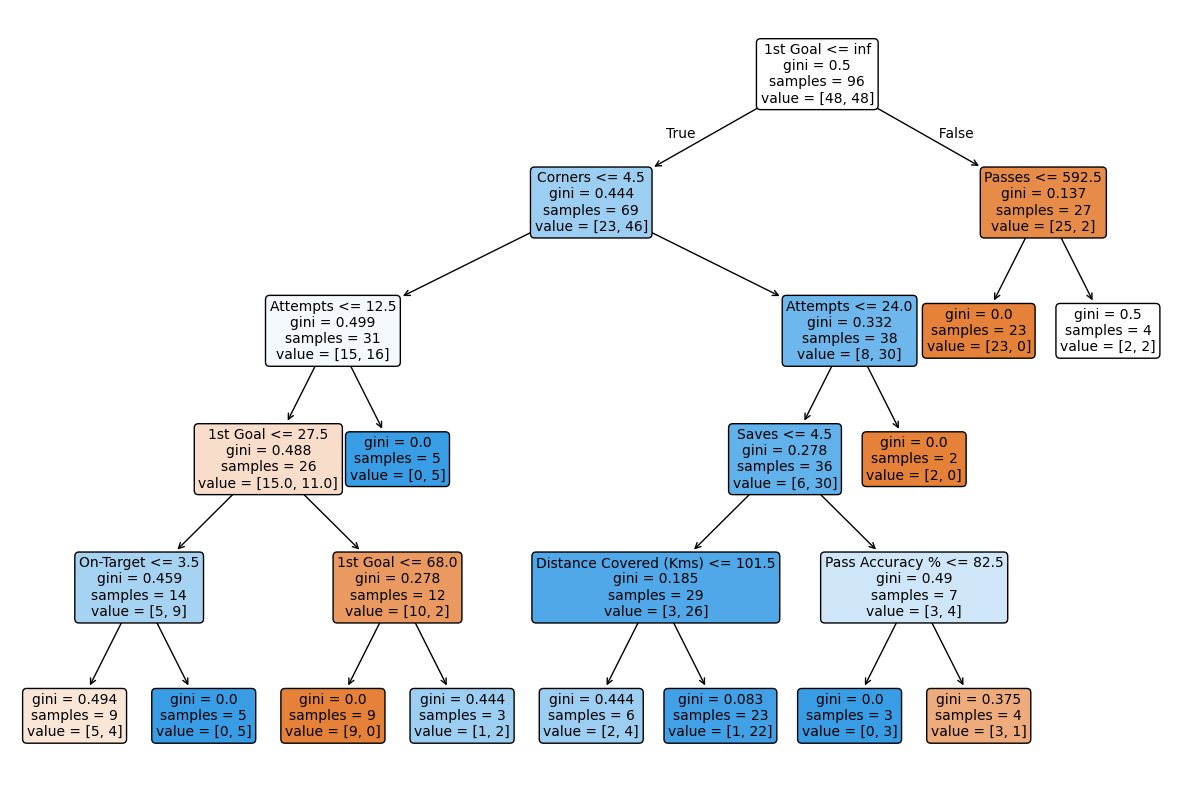

In [2]:
# 🟢 Vẽ Decision Tree bằng Matplotlib
plt.figure(figsize=(15, 10))  # Điều chỉnh kích thước đồ thị
plot_tree(tree_model, feature_names=feature_names, filled=True, rounded=True, fontsize=10)
plt.show()

Hướng dẫn đọc cây quyết định:
- Các nút lá có nhánh con hiển thị tiêu chí phân chia của chúng ở phía trên.
- Cặp giá trị ở phía dưới biểu thị số lượng giá trị False và True của mục tiêu tương ứng, đối với các điểm dữ liệu trong nút đó của cây.

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv('FIFA 2018 Statistics.csv')
y = (data['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(train_X, train_y)

Dưới đây là mã code để tạo Biểu Đồ Phụ Thuộc Một Phần (*Partial Dependence Plot - PDP*) bằng thư viện scikit-learn.

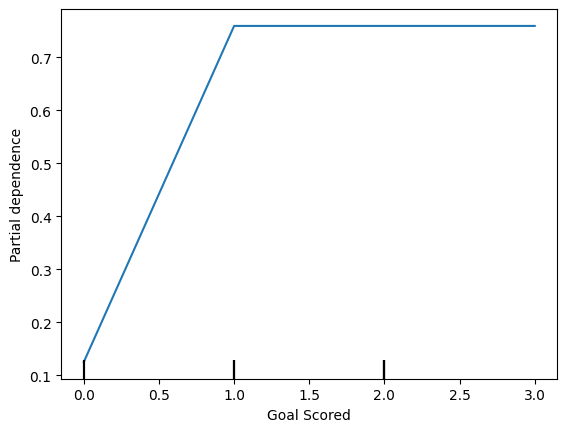

In [4]:
from matplotlib import pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# Create and plot the data
disp1 = PartialDependenceDisplay.from_estimator(tree_model, val_X, ['Goal Scored'])
plt.show()

Trục y được hiểu là **sự thay đổi trong dự đoán** so với giá trị dự đoán tại điểm cơ sở hoặc giá trị nhỏ nhất bên trái.

Từ biểu đồ này, chúng ta thấy rằng việc ghi một bàn thắng làm tăng đáng kể cơ hội giành danh hiệu "Cầu thủ xuất sắc nhất trận" (*Man of The Match*). Tuy nhiên, những bàn thắng bổ sung sau đó dường như không có nhiều tác động đến dự đoán.

Dưới đây là một ví dụ biểu đồ khác:

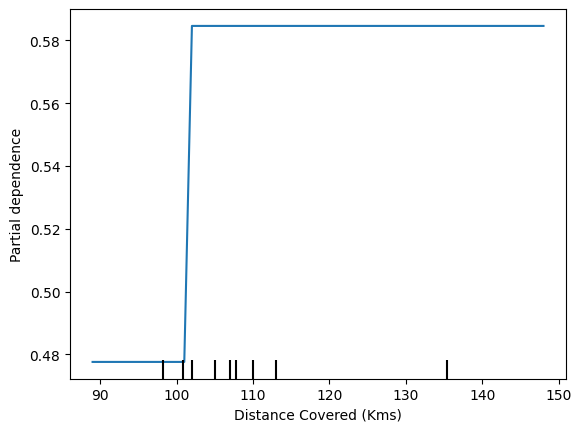

In [5]:
feature_to_plot = 'Distance Covered (Kms)'
disp2 = PartialDependenceDisplay.from_estimator(tree_model, val_X, [feature_to_plot])
plt.show()

Biểu đồ này có vẻ quá đơn giản để phản ánh thực tế. Tuy nhiên, đó là do mô hình của chúng ta quá đơn giản. Nếu bạn quan sát cây quyết định ở trên, bạn sẽ thấy rằng biểu đồ này phản ánh chính xác cấu trúc của mô hình.

Bạn có thể dễ dàng so sánh cấu trúc hoặc tác động của các mô hình khác nhau. Dưới đây là biểu đồ tương tự nhưng sử dụng mô hình Random Forest.

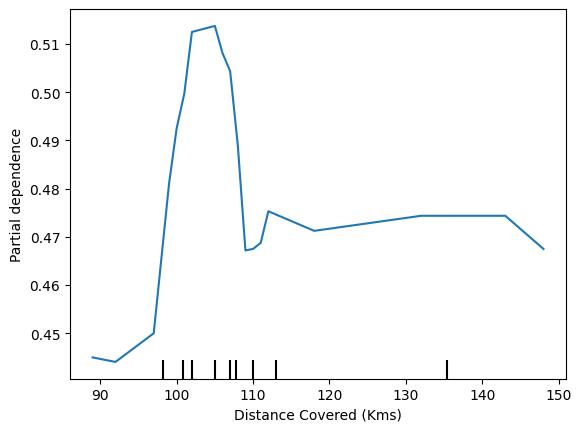

In [6]:
# Build Random Forest model
rf_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

disp3 = PartialDependenceDisplay.from_estimator(rf_model, val_X, [feature_to_plot])
plt.show()

Mô hình này cho rằng bạn có nhiều khả năng giành danh hiệu *Cầu thủ xuất sắc nhất trận* (*Man of the Match*) nếu tổng quãng đường chạy của các cầu thủ đạt khoảng 100km trong suốt trận đấu. Tuy nhiên, chạy nhiều hơn mức đó lại khiến xác suất chiến thắng giảm.

Nhìn chung, đường cong mượt mà của biểu đồ này có vẻ hợp lý hơn so với hàm bậc thang từ mô hình Cây Quyết Định (*Decision Tree*). Tuy nhiên, tập dữ liệu này khá nhỏ, nên chúng ta cần cẩn trọng khi diễn giải bất kỳ mô hình nào.

## Biểu Đồ Phụ Thuộc Một Phần 2D (*2D Partial Dependence Plots*)  
Nếu bạn tò mò về sự tương tác giữa các đặc trưng, biểu đồ phụ thuộc một phần 2D cũng rất hữu ích. Một ví dụ sẽ giúp làm rõ điều này.

Chúng ta sẽ tiếp tục sử dụng mô hình Cây Quyết Định cho biểu đồ này. Nó sẽ tạo ra một biểu đồ cực kỳ đơn giản, nhưng bạn sẽ có thể liên kết những gì thấy trong biểu đồ với cấu trúc của cây quyết định.

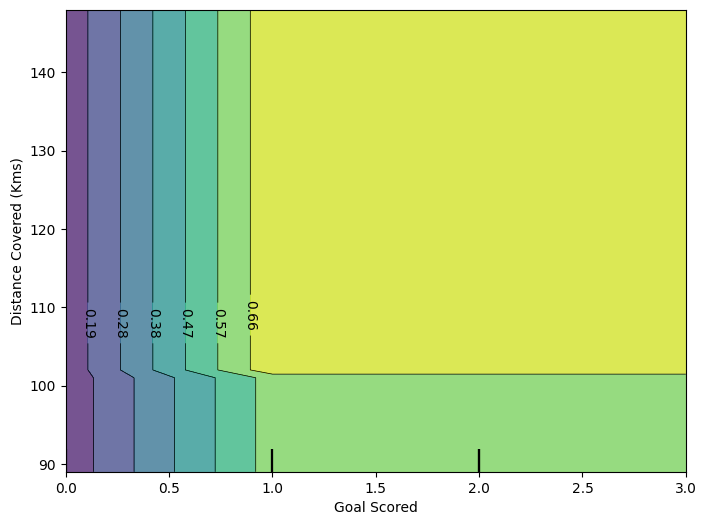

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))
f_names = [('Goal Scored', 'Distance Covered (Kms)')]
# Similar to previous PDP plot except we use tuple of features instead of single feature
disp4 = PartialDependenceDisplay.from_estimator(tree_model, val_X, f_names, ax=ax)
plt.show()

Biểu đồ này hiển thị dự đoán cho mọi kết hợp giữa số bàn thắng ghi được (*Goals Scored*) và tổng quãng đường chạy (*Distance Covered*).

Ví dụ, chúng ta thấy rằng dự đoán cao nhất xảy ra khi một đội ghi ít nhất 1 bàn thắng và tổng quãng đường chạy của họ gần 100km. Nếu đội không ghi bàn (*0 goals*), thì quãng đường chạy không ảnh hưởng đến dự đoán. Bạn có thể thấy điều này bằng cách lần theo cây quyết định khi số bàn thắng bằng 0 không?

Tuy nhiên, quãng đường chạy có thể ảnh hưởng đến dự đoán nếu đội có ghi bàn. Hãy chắc chắn rằng bạn có thể quan sát điều này từ biểu đồ phụ thuộc một phần 2D. Bạn có thể thấy mẫu này trong cây quyết định không?

## Đến Lượt Bạn

**[Kiểm tra hiểu biết của bạn](https://www.kaggle.com/kernels/fork/1637380)** với các câu hỏi lý thuyết và một thử thách mã hóa ngắn.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/machine-learning-explainability/discussion) to chat with other learners.*